# Tweet Intent Prediction Using Machine Learning Algorithms

## Task:

**Identify the intent of tweet using one of the ML models.**

# What is Intent Classification?

The definition of intent is being focused on something.

- Intent recognition — sometimes called **intent classification** — is the task of taking a written or spoken input, and classifying it **based on what the user wants to achieve.**


- **Intent recognition forms an essential component of chatbots and finds use in sales conversions, customer support, and many other areas.**


- Intent recognition is a form of natural language processing (NLP), a subfield of artificial intelligence. 


- NLP is concerned with computers processing and analyzing natural language.


- Intent recognition works through the process of providing examples of text alongside their intents to a machine learning (ML) model. This is known as using training data to train a model

## Work flow of this project :

1.Data Cleaning

2.EDA

3.Text Preprocessing

4.Model Building

5.Model Prediction

6.Website Building (Streamlit)

7.Model Deployment (Heruko)

In [1]:
# Import required Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset to the system

dataset = pd.read_csv("Tweet.csv")
print("Data Imported Successfully!!!!!")

Data Imported Successfully!!!!!


## 1. Data Cleaning :

In [3]:
# Observe the dataset head.

dataset.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [4]:
# check shape of the dataset (rows x colms)

print("The shape of the datatset is :",dataset.shape)

The shape of the datatset is : (127453, 4)


In [5]:
# check the total no. of NA values in each attributes .

dataset.isnull().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

In [6]:
# Drop the NA values from the dataset 

dataset = dataset.dropna()

In [7]:
# check again  the total no. of NA values in each attributes .

dataset.isnull().sum()

id                  0
tweet_text          0
tweet_created_at    0
tweet_intent        0
dtype: int64

In [8]:
# check the total duplicate rows in a dataset.

print("Total Duplicate rows in a dataset :",dataset.duplicated().sum())

Total Duplicate rows in a dataset : 0


In [9]:
# check the datatype information of the dataset .

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96364 entries, 0 to 96363
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                96364 non-null  int64 
 1   tweet_text        96364 non-null  object
 2   tweet_created_at  96364 non-null  object
 3   tweet_intent      96364 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [10]:
# Drop the unwanted attributes coz we only need 1.tweet text  and 2. tweet intent 

dataset = dataset.drop(["id" ,"tweet_created_at"] , axis = 1) # axis = 1 : column ; axis = 0 : rows

In [11]:
#  check the shape  values again 

print("Shape after drop columns of the dataset :" , dataset.shape)

Shape after drop columns of the dataset : (96364, 2)


In [12]:
# change the name of columns tweet_text and tweet_intent as result and text to make it more readable 

dataset.rename(columns={"tweet_text":"tweet" ,"tweet_intent":"intent"} , inplace =True)
dataset.head(5)

,tweet,intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community


In [13]:
# Check the intent and its Quantity

dataset["intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: intent, dtype: int64

In [14]:
# since the result are in textual form + its multi label so we can use label encoding 

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset["intent"] = lb.fit_transform(dataset["intent"])

# check the label encoding 
dataset.head(5)

,tweet,intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,1
1,Need Sick Character artâ_x009d_“#art #artist #...,3
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,0
3,@CryptoBatzNFT @DarekBTW The first project in ...,1
4,@sashadysonn The first project in crypto with ...,1


In [15]:
# Check the intent and its Quantity

dataset["intent"].value_counts()

1    41510
3    21041
0    16451
7     8320
6     5107
2     3049
8      477
4      276
5      133
Name: intent, dtype: int64

## 2. EDA :

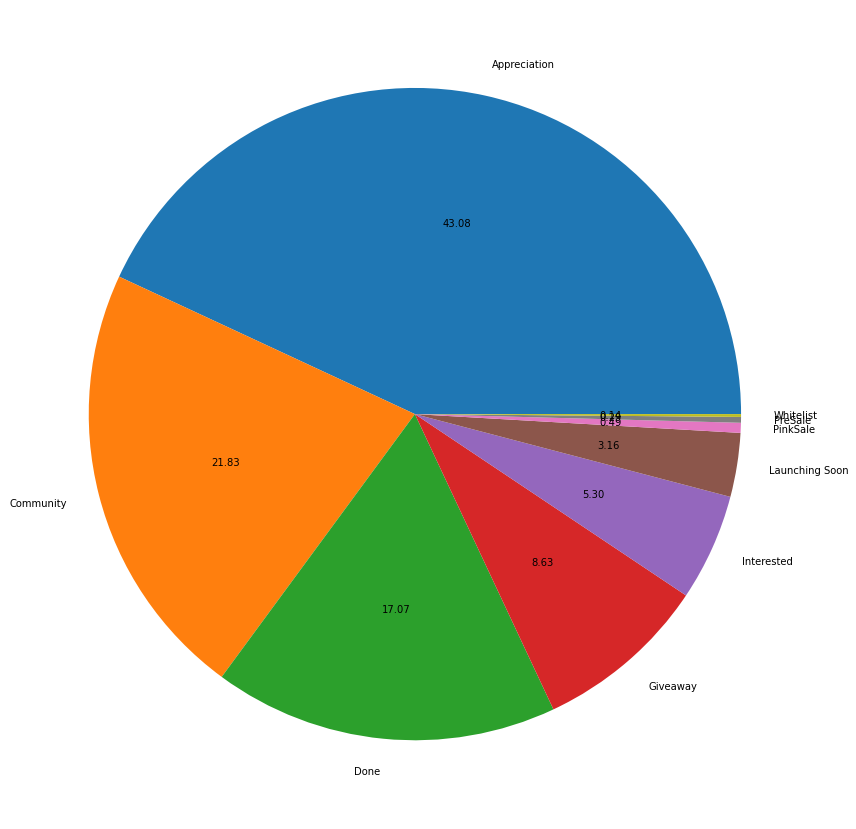

In [16]:
# 1. Check the distribution of spam and not spam in a dataset via pie chart .

plt.figure(figsize=(15,15))
plt.pie(dataset["intent"].value_counts() , autopct="%0.2f" , labels=['Appreciation', 'Community', 'Done', 
'Giveaway', 'Interested', 'Launching Soon', 'PinkSale', 'PreSale', 'Whitelist'])

plt.show()

# so data is higly inbalanced and we need to keep this in mind while training.

In [17]:
# install nltk like this

!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
# import nltk and its dependency 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# 2. as we have only two columns it becomes difficult to analyse deeply via Graphical viz so we will  create 3 more colms
# those are 1. No_of_chars 2.No_of_words 3.No_of sents .

# calculate the total characeters in a sentence includes alpha numerics and puncts.
dataset["No_of_chars"] = dataset["tweet"].apply(len)

# calculate the total no. of words in a sentence using word tokenize from nltk
dataset["No_of_words"] = dataset["tweet"].apply(lambda x : len(nltk.word_tokenize(x)))

# calculate the total no. of sentence in a text  using sentence tokenize from nltk
dataset["No_of_sent"] = dataset["tweet"].apply(lambda x : len(nltk.sent_tokenize(x)))

# preview what we had  actaully achieved by all this
dataset.head(5)

,tweet,intent,No_of_chars,No_of_words,No_of_sent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,1,483,71,3
1,Need Sick Character artâ_x009d_“#art #artist #...,3,300,50,1
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,0,95,19,2
3,@CryptoBatzNFT @DarekBTW The first project in ...,1,284,53,4
4,@sashadysonn The first project in crypto with ...,1,272,51,4


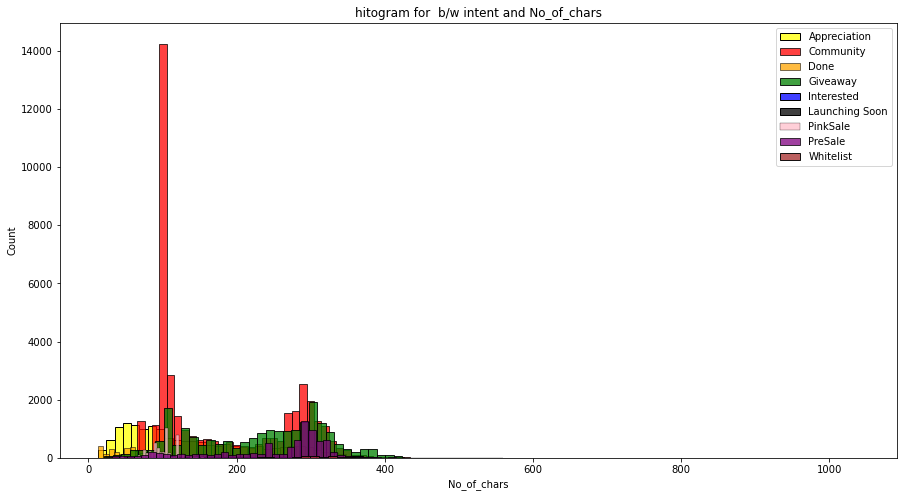

In [20]:
# if somehow you dont understand the statistics .. then dont worry we will plot those and understand via Viz.

plt.figure(figsize=(15,8))
sns.histplot(dataset[dataset["intent"] == 0]["No_of_chars"] ,color= "yellow")
sns.histplot(dataset[dataset["intent"] == 1]["No_of_chars"] , color="red") 
sns.histplot(dataset[dataset["intent"] == 2]["No_of_chars"] , color="orange")
sns.histplot(dataset[dataset["intent"] == 3]["No_of_chars"] , color="green")
sns.histplot(dataset[dataset["intent"] == 4]["No_of_chars"] , color="blue")
sns.histplot(dataset[dataset["intent"] == 5]["No_of_chars"] , color="black")
sns.histplot(dataset[dataset["intent"] == 6]["No_of_chars"] , color="pink")
sns.histplot(dataset[dataset["intent"] == 7]["No_of_chars"] , color="purple")
sns.histplot(dataset[dataset["intent"] == 8]["No_of_chars"] , color="brown")

plt.title("hitogram for  b/w intent and No_of_chars" )
plt.legend(labels = ['Appreciation', 'Community', 'Done', 
'Giveaway', 'Interested', 'Launching Soon', 'PinkSale', 'PreSale', 'Whitelist'])
plt.show()

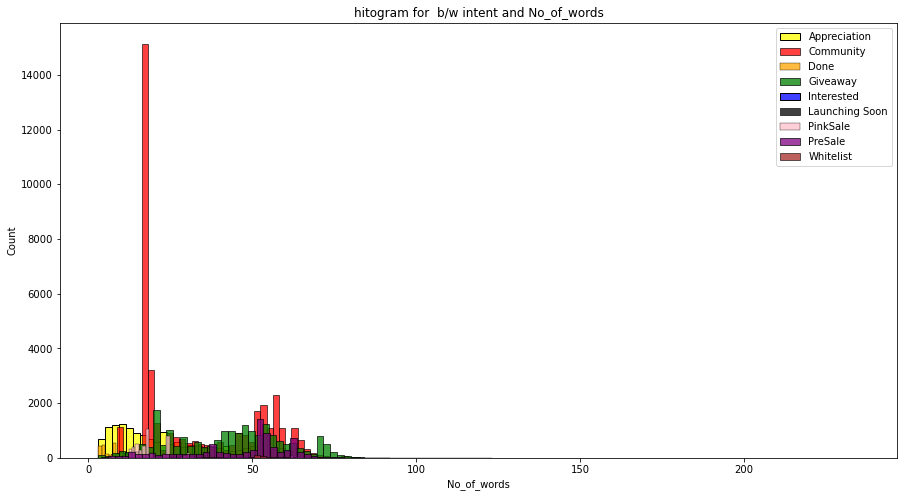

In [21]:
# if somehow you dont understand the statistics .. then dont worry we will plot those and understand via Viz.

plt.figure(figsize=(15,8))
sns.histplot(dataset[dataset["intent"] == 0]["No_of_words"] ,color= "yellow")
sns.histplot(dataset[dataset["intent"] == 1]["No_of_words"] , color="red") 
sns.histplot(dataset[dataset["intent"] == 2]["No_of_words"] , color="orange")
sns.histplot(dataset[dataset["intent"] == 3]["No_of_words"] , color="green")
sns.histplot(dataset[dataset["intent"] == 4]["No_of_words"] , color="blue")
sns.histplot(dataset[dataset["intent"] == 5]["No_of_words"] , color="black")
sns.histplot(dataset[dataset["intent"] == 6]["No_of_words"] , color="pink")
sns.histplot(dataset[dataset["intent"] == 7]["No_of_words"] , color="purple")
sns.histplot(dataset[dataset["intent"] == 8]["No_of_words"] , color="brown")

plt.title("hitogram for  b/w intent and No_of_words" )
plt.legend(labels = ['Appreciation', 'Community', 'Done', 
'Giveaway', 'Interested', 'Launching Soon', 'PinkSale', 'PreSale', 'Whitelist'])
plt.show()

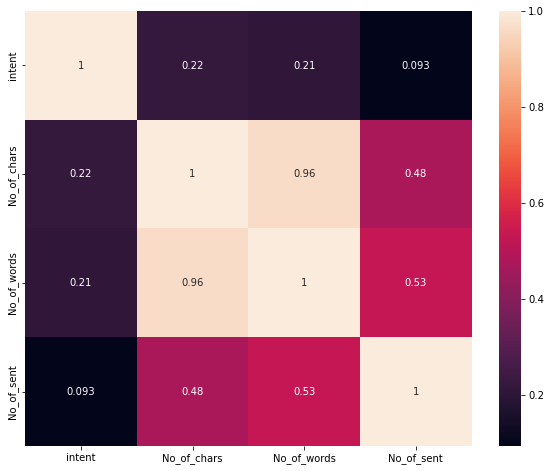

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Heatmap Breakdown :

# 1. Intent is highly influneced by No_of_char by 22% , following no_of_words with 21%.
# 2. Intent is least influneced by No_of_sent by 9.3% .

## 3. Data ( Text ) Preprocessing :

### So 3 stage of the project. Here we use the concept of NLP since data is textual.

#### Plan of attack :

- Step 1 : Convert / tranformed text building  a function via ( which has a following steps)



1. Lowercase 
2. Tokenization 
3. Remove special words
4. Remove stopwords and puncts
5. stemming


- Step 2 : Build a word cloud  of top 100 in intent.


- Step 3 : Implement above Step 1 and Step 2 and move to Stage 4  ( Model Building)

In [23]:
# Step 1 : Build a tranformed_text function :

def text_preprocesing(text):
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenizse
    text = nltk.word_tokenize(text)
    
    list = []   # since text is already tokenized and lowercase , below code will remove special chars and store into list
    
    # 3. Remove special words
    for i in text :
        if i.isalnum():
            list.append(i)
       
    text = list[:] # since list is filled with text with no special chars and lowez and tokz it will again clone to text
    list.clear()   # and it will be clear to append new tranformed text with no stopword and puncts
    
    
    # 4. stemming
    
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    
    for i in text:
        list.append(ps.stem(i))
    
    
    return " ".join(list)
    
            

In [24]:
# make a sep colum named as tranformed_text in a dataset for this processed text ( data)

dataset["tranformed_text"] = dataset["tweet"].apply(text_preprocesing)

# previw the dataset after adding new attribute
dataset.head(5)

,tweet,intent,No_of_chars,No_of_words,No_of_sent,tranformed_text
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,1,483,71,3,ecology1990 moonrunnersnft itsukinft thelittle...
1,Need Sick Character artâ_x009d_“#art #artist #...,3,300,50,1,need sick charact art artist artist anim illus...
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,0,95,19,2,inagotchinft tesla killabearsnft elonmusk grea...
3,@CryptoBatzNFT @DarekBTW The first project in ...,1,284,53,4,cryptobatznft darekbtw the first project in cr...
4,@sashadysonn The first project in crypto with ...,1,272,51,4,sashadysonn the first project in crypto with m...


In [25]:
dataset["tweet"][0]

"@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ðŸ_x0090_¶ A new cryptocurrency was born by fans of the Chihuahua meme community. It's just simply pets love and keep 1% from each transaction which will be automatically distributed. \nâ€¼ï¸_x008f_CA: 0x2fd6c9B869Dea106730269E13113361b684f843a\n @Chihuahua_bsc\nTG: https://t.co/wqSzCivfaM"

In [26]:
dataset["tranformed_text"][0]

'ecology1990 moonrunnersnft itsukinft thelittlesnft wdoopsi womenandweapon wowpixiesnft bokinft quirkiesnft sophiegreen86 a new cryptocurr wa born by fan of the chihuahua meme commun it just simpli pet love and keep 1 from each transact which will be automat distribut 0x2fd6c9b869dea106730269e13113361b684f843a tg http'

In [27]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# This is an optional task if anybody want to explore more via Viz about new tranformed text 

# Step 2 : Build a word cloud .

from wordcloud import WordCloud
wc = WordCloud (width=500 , height= 500 ,min_font_size=10,background_color='white')

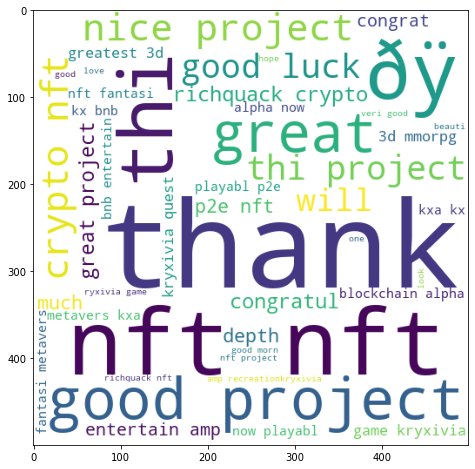

In [29]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 0 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

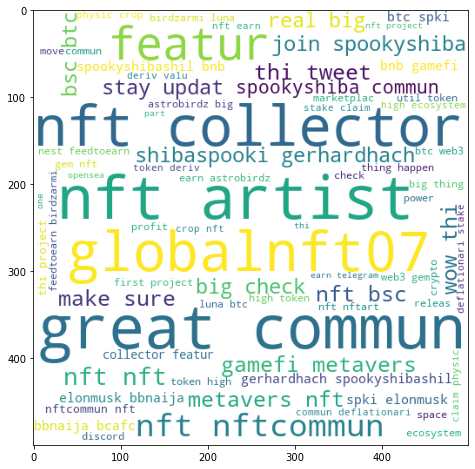

In [30]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 1 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

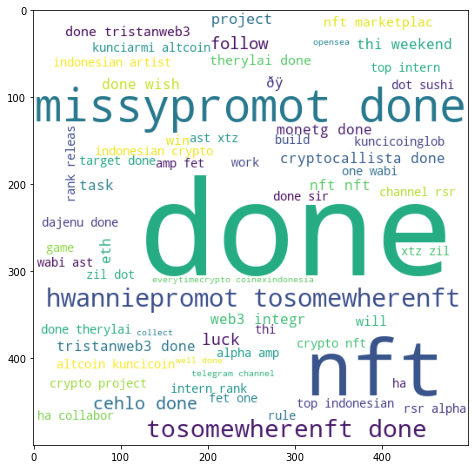

In [31]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 2 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

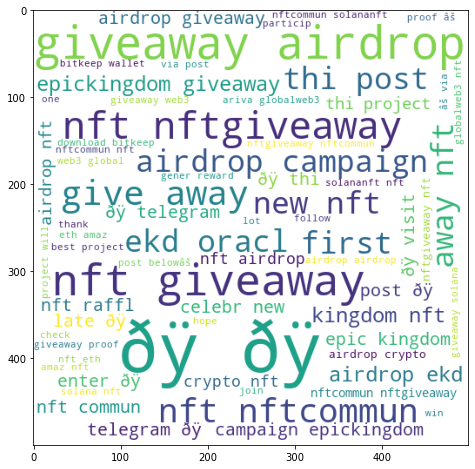

In [32]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 3 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

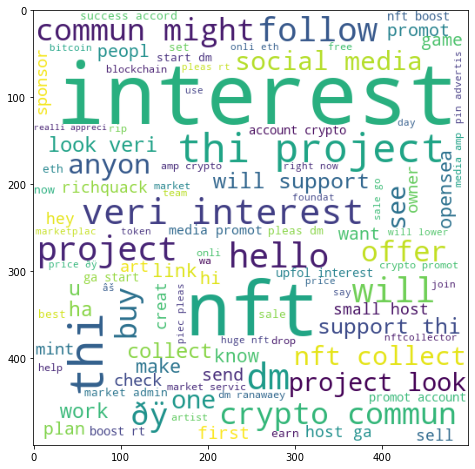

In [33]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 4 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

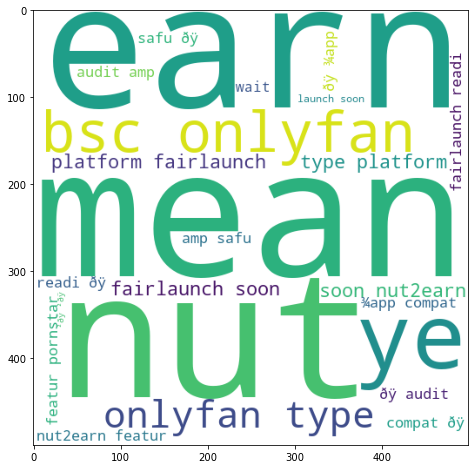

In [34]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 5 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

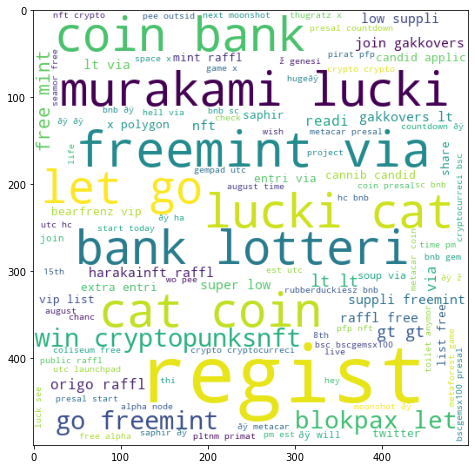

In [35]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 6 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

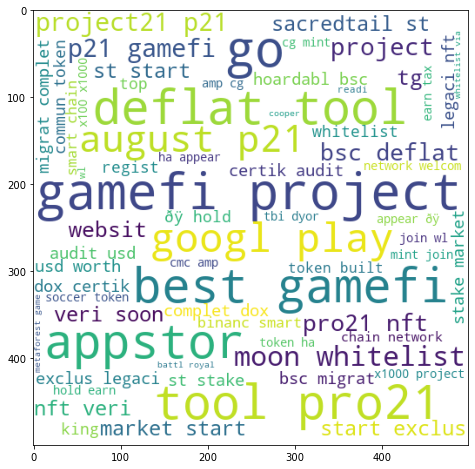

In [36]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 7 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

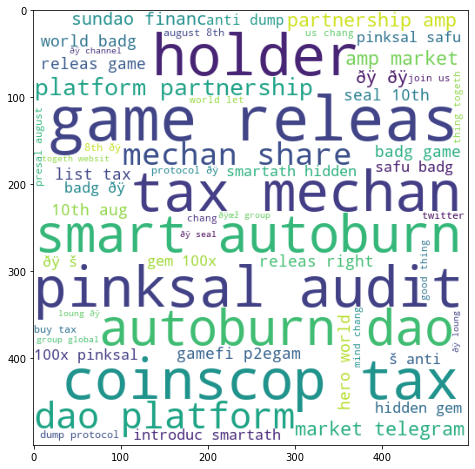

In [37]:
# Spam message top words ( or most frequent words used) in tranformed text
spam_wc = wc.generate(dataset[dataset["intent"] == 8 ]["tranformed_text"].str.cat(sep=" "))

# plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

## 4. Model Building :

In [38]:
# Now lets head to step / stage 4 ... Finally building a model using some famous algorithms for text calssification.
# by default naives bayes is preferly or argubelythe best with Multinomial and binomial distribution but we will still look
# to other algoriths as well

# Point to remember here our prime priority will be precision more than accuracy since in text classification bcoz 
# Precision refers to how close measurements of the same item are to each other while 
# Accuracy refers to the closeness of a measured value to a standard or known value. ..

# before heading lets split the data in input (tranaformed text) and output ( results) using Bags of words and TF-IDF

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

#X_cv    = cv.fit_transform(dataset["tranformed_text"]).toarray()
X_tfidf = tfidf.fit_transform(dataset["tranformed_text"]).toarray() 

y = dataset["intent"]

# Note toarray() is important bcoz Matrices that contain mostly zero values are called sparse (our data),
# distinct from matrices where most of the values are non-zero, called dense

# otherwise this error will be seen "A sparse matrix was passed, but dense data is required.
# Use X.toarray() to convert to a dense numpy array."

#print("Shape of X in count Vectorizer is : " , X_cv.shape) # shape ( rows X freq words)
print("------------------------------------------------------")
print("Shape of X in TF-IDF is : " , X_tfidf.shape)
print("------------------------------------------------------")
print("Shape of y is : ", y.shape)

------------------------------------------------------
Shape of X in TF-IDF is :  (96364, 3000)
------------------------------------------------------
Shape of y is :  (96364,)


In [39]:
#  again before feeding to any algo we need  to split the dataset intop train and test but this time using TF-IDF only

from sklearn.model_selection import train_test_split
X_tfidf_train ,X_tfidf_test , y_train , y_test = train_test_split(X_tfidf , y , test_size=0.2 , random_state= 0)

In [41]:
# so let us  start with naive bayes then we will head to rest algos.

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

# create an object of this distributuions
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


print("Gaussian Distributuion ")



print("---------------------------------------------------------------")

gnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_gnb = gnb.predict(X_tfidf_test)
print("accuracy of GNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_gnb)*100)
print("Confsuion matrix of GNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_gnb))
print("precision of GNB in tfidf is :",precision_score(y_test,y_pred_tfidf_gnb, average='micro')*100)




Gaussian Distributuion 
---------------------------------------------------------------
accuracy of GNB in tfidf is : 58.200591501063656
Confsuion matrix of GNB in tfidf is :
 [[2057   57  322   57   38  175   43  491   92]
 [ 203 2374   51  243  281   14    4 5115    1]
 [  27    3  508    7    9    5    1   12    4]
 [  85   23   23 3746   15    6    7  303    4]
 [  18    2    8    0   26    0    0    9    0]
 [   0    0    0    2    0   19    0    3    0]
 [  11    2   10    7   24    1  969    8    0]
 [  54   28   33   55   22    3   23 1424    5]
 [   1    0    0    0    0    0    0    6   94]]
precision of GNB in tfidf is : 58.200591501063656


In [42]:
print("Multinomial Distrubution")

mnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_mnb = mnb.predict(X_tfidf_test)
print("accuracy of MNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_mnb)*100)
print("Confsuion matrix of MNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_mnb))
print("precision of MNB in tfidf is :",precision_score(y_test,y_pred_tfidf_mnb, average='micro')*100)

Multinomial Distrubution
accuracy of MNB in tfidf is : 85.20728480257354
Confsuion matrix of MNB in tfidf is :
 [[2973  176   14  155    0    0    2   12    0]
 [ 498 6940    2  802    0    0    1   43    0]
 [  63   18  455   36    0    0    0    4    0]
 [ 224   55    4 3901    0    0   17   11    0]
 [  47    8    0    5    3    0    0    0    0]
 [   0    1    0    3    0   20    0    0    0]
 [  28   17    0   39    0    0  936   12    0]
 [ 172  113    0  225    0    0   37 1098    2]
 [   0    0    0    0    0    0    0    5   96]]
precision of MNB in tfidf is : 85.20728480257354


In [43]:
print("Bernoulii Distrubution") 

bnb.fit(X_tfidf_train,y_train)
y_pred_tfidf_bnb = bnb.predict(X_tfidf_test)
print("accuracy of BNB in tfidf is :",accuracy_score(y_test,y_pred_tfidf_bnb)*100)
print("Confsuion matrix of BNB in tfidf is :\n" , confusion_matrix(y_test,y_pred_tfidf_bnb))
print("precision of BNB in tfidf is :",precision_score(y_test,y_pred_tfidf_bnb, average='micro')*100)

Bernoulii Distrubution
accuracy of BNB in tfidf is : 81.06677735692419
Confsuion matrix of BNB in tfidf is :
 [[3031   29   96  124   41    0    0   11    0]
 [ 300 6104  215 1373  170    0   17  106    1]
 [  45    1  505    7   14    0    0    4    0]
 [ 152   30  103 3839   39    0   36   10    3]
 [  23    1    0    2   37    0    0    0    0]
 [   1    0    0    1    0   20    0    2    0]
 [  57    0    7   17    2    0  930   14    5]
 [ 143   79   78  180   40    0   67 1057    3]
 [   0    0    0    0    0    0    0    0  101]]
precision of BNB in tfidf is : 81.06677735692419


#### Note : After run the cell  TF-IDF in Naive bayes with Multinomial Dist is accpeted with Accuracy : 85 % & Precision = 85% 

In [44]:

import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))



# 5. Model Testing

In [45]:
input_sms = "Thanks for connecting! 'Like' us on Facebook and get entered to win an iPad" #giveaway
#input_sms = "i really like your reaerch work" #Appreciation
#input_sms = "what if we told you there are other people who are interested in the same things you’re into?" #Launching soon
#input_sms = "Just want to say thank you for an incredible Lidstar launch day" #Appreciation


In [46]:
# 1. preprocess
transformed_sms = text_preprocesing(input_sms)
    # 2. vectorize
vector_input = tfidf.transform([transformed_sms])


In [47]:
vector_input[0]

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [48]:
# 3. predict
result = mnb.predict(vector_input)[0]
    # 4. Display
if result == 0:
    print("Appreciation")
elif result == 1:
    print("Community")
elif result == 2:
    print("Done")
elif result == 3:
    print("Giveaway")
elif result == 4:
    print("Interested ")
elif result == 5:
    print("Launching Soon")
elif result == 6:
    print("Presale")
elif result == 7:
    print("Whitelist")

Giveaway


- App link :



- Notebook Link(TFIDF) :



- Collab link (ML ALgos): 



- Gdrive Link :


- GitHub link : 